In [27]:
pip install transformers datasets tokenizers pandas matplotlib


In [28]:
# Import the AutoTokenizer class from the transformers library
# AutoTokenizer is a versatile tool that can automatically load the appropriate tokenizer for any pre-trained model from the Hugging Face Model Hub.
from transformers import AutoTokenizer

# Load a pre-trained tokenizer based on the BERT model (bert-base-uncased)
# The "bert-base-uncased" tokenizer is trained to convert text into tokens that match the input format required by the BERT model.
# "Uncased" means that the tokenizer does not distinguish between uppercase and lowercase letters.
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a sample feedback string
# This string simulates a typical piece of customer feedback, which includes sentiments about different aspects of a product or service.
feedback = "I’m really disappointed with the delivery time. The product quality was great, but the delay ruined my experience."

# Tokenize the feedback string
# Tokenization is the process of breaking down the text into smaller units called tokens.
# Each token can be a word, subword, or punctuation mark.
# The tokenizer uses the BERT model's tokenization rules to convert the input text into tokens.
tokens = tokenizer.tokenize(feedback)

# Print the resulting tokens
# This will display the list of tokens generated by the tokenizer.
# The output will show how the text has been broken down into individual tokens, including how contractions and punctuation are handled.
print("Tokens:", tokens)


Tokens: ['i', '’', 'm', 'really', 'disappointed', 'with', 'the', 'delivery', 'time', '.', 'the', 'product', 'quality', 'was', 'great', ',', 'but', 'the', 'delay', 'ruined', 'my', 'experience', '.']


In [29]:
# Import the pipeline function from the transformers library
# The pipeline function provides a simple way to use pre-trained models for various NLP tasks.
from transformers import pipeline

# Load a pre-trained sentiment analysis model using the pipeline function
# By specifying "sentiment-analysis", the pipeline automatically loads a model that is fine-tuned for determining the sentiment of text (e.g., positive, negative).
# This model is typically based on BERT or another Transformer model and is ready to use without further training.
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze the sentiment of the feedback text
# The sentiment_analyzer object is used to process the feedback string and determine its sentiment.
# The model will output a label (e.g., "POSITIVE" or "NEGATIVE") and a confidence score for each label.
sentiment = sentiment_analyzer(feedback)

# Print the resulting sentiment analysis
# The sentiment output is a list of dictionaries, where each dictionary contains the label (sentiment) and the model's confidence score.
# The print statement will display this information, showing whether the feedback is classified as positive, negative, etc., along with how confident the model is in its prediction.
print("Sentiment:", sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment: [{'label': 'NEGATIVE', 'score': 0.9996792078018188}]


In [30]:
# Import the pipeline function from the transformers library
# The pipeline function is a high-level API provided by the transformers library.
# It simplifies the process of using pre-trained models for various NLP tasks, such as text classification, sentiment analysis, etc.
from transformers import pipeline

# Create a pipeline for text classification using a specific pre-trained model
# The pipeline function is initialized with two parameters:
# 1. "text-classification": Specifies the type of NLP task to be performed, which in this case is text classification.
# 2. model="KareenaBeniwal/Fine-tuned-bert-model-classification": Specifies the exact model to use for the task.
#    The model is hosted on Hugging Face's Model Hub and is identified by the user name ("KareenaBeniwal") and model name ("Fine-tuned-bert-model-classification").
#    This model has been fine-tuned specifically for a text classification task.
pipe = pipeline("text-classification", model="KareenaBeniwal/Fine-tuned-bert-model-classification")


In [31]:
# Import the AutoTokenizer and AutoModelForSequenceClassification classes from the transformers library
# AutoTokenizer is used to load the tokenizer associated with a pre-trained model, which converts text into tokens.
# AutoModelForSequenceClassification is used to load the pre-trained model itself, specifically designed for sequence classification tasks.
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load the tokenizer using the AutoTokenizer class
# The tokenizer is responsible for converting input text into tokens (numerical format) that the model can understand.
# The from_pretrained method loads a pre-trained tokenizer from the Hugging Face Model Hub.
# "KareenaBeniwal/Fine-tuned-bert-model-classification" specifies the exact tokenizer to load, which has been fine-tuned for a specific task.
tokenizer = AutoTokenizer.from_pretrained("KareenaBeniwal/Fine-tuned-bert-model-classification")

# Load the model using the AutoModelForSequenceClassification class
# The model is responsible for making predictions based on the input tokens.
# The from_pretrained method loads the pre-trained model from the Hugging Face Model Hub.
# "KareenaBeniwal/Fine-tuned-bert-model-classification" specifies the exact model to load, which is fine-tuned for sequence classification tasks (e.g., text classification).
model = AutoModelForSequenceClassification.from_pretrained("KareenaBeniwal/Fine-tuned-bert-model-classification")


In [32]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import pipeline
# Load a pre-trained tokenizer using the AutoTokenizer class
# The tokenizer is responsible for converting input text into tokens that the model can process.
# "bert-base-uncased" refers to the BERT model's tokenizer that lowercases the input text before tokenizing it.\

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# Load a pre-trained model for sequence classification using the AutoModelForSequenceClassification class
# The model has been fine-tuned specifically for a classification task.
# "KareenaBeniwal/Fine-tuned-bert-model-classification" specifies the exact model to load from Hugging Face's Model Hub.
model = AutoModelForSequenceClassification.from_pretrained("KareenaBeniwal/Fine-tuned-bert-model-classification")

# Create a pipeline for text classification
# The pipeline function is used to create a classifier pipeline that ties together the model and tokenizer.
# The pipeline is initialized with three arguments:
# 1. "text-classification": Specifies the type of NLP task, which in this case is text classification.
# 2. model=model: Specifies the pre-trained model to use for classification.
# 3. tokenizer=tokenizer: Specifies the tokenizer to use for converting text into tokens.
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Classify the input feedback text using the classifier pipeline
# The classifier object takes the feedback text, tokenizes it, and passes it through the model to generate a classification.
# The classification output will include the predicted class label and a confidence score.
classification = classifier(feedback)
# Print the classification result
# This will output the issue classification label and the confidence score generated by the model.
print("Issue Classification:", classification)

Issue Classification: [{'label': 'LABEL_4', 'score': 0.5499079823493958}]


In [33]:
# Load a pre-trained Named Entity Recognition (NER) model using the pipeline function
# The "ner" argument specifies that the task is Named Entity Recognition, where the model will identify entities in the text.
# The aggregation_strategy="simple" argument ensures that tokens representing the same entity are grouped together into a single entity span.
ner = pipeline("ner", aggregation_strategy="simple")
# Perform Named Entity Recognition on the feedback text
# The ner object processes the feedback text and identifies named entities within it.
# The result is a list of dictionaries, where each dictionary contains the identified entity, its type (e.g., PERSON, LOCATION), and its position in the text.
entities = ner(feedback)
# Print the identified named entities
# This outputs the list of named entities and their corresponding types, as detected by the NER model.
print("Named Entities:", entities)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Named Entities: []


In [34]:
# Import the pandas library for data manipulation and analysis
# pandas provides data structures like DataFrames to handle and analyze data efficiently.
import pandas as pd

# Create a DataFrame to store feedback analysis results
# A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).
data = {
    "Feedback": [feedback],  # Column for storing the original feedback text
    "Sentiment": [sentiment[0]['label']],  # Column for storing the sentiment label derived from the sentiment analysis
    "Issue Category": [classification[0]['label']],  # Column for storing the issue category label derived from the text classification
    "Entities": [entities]  # Column for storing the named entities detected in the feedback text
}

# Create a DataFrame using the data dictionary
# The DataFrame will have one row with columns corresponding to the feedback, sentiment, issue category, and named entities.
df = pd.DataFrame(data)

# Print the DataFrame to display the feedback analysis results
print(df)

                                            Feedback Sentiment Issue Category  \
0  I’m really disappointed with the delivery time...  NEGATIVE        LABEL_4   

  Entities  
0       []  


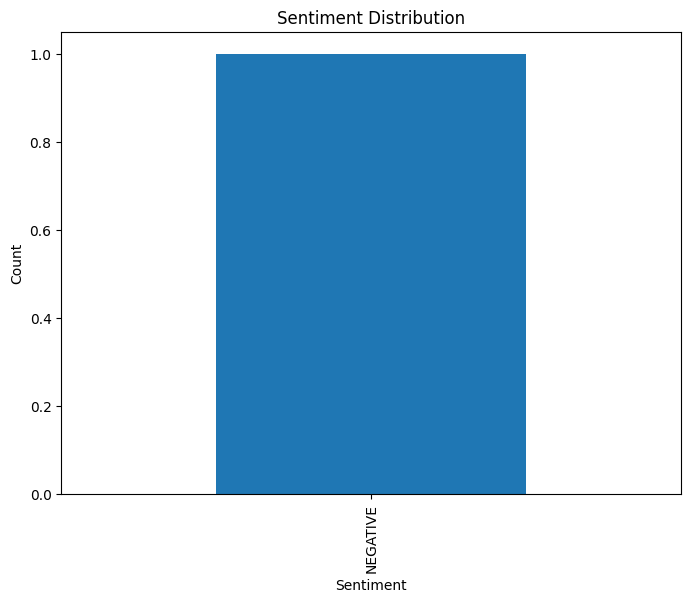

In [35]:
import matplotlib.pyplot as plt

# Example: Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Setup Environment:

In [36]:
pip install transformers datasets tokenizers pandas numpy scikit-learn matplotlib nltk spacy


Tokenization and Normalization using Hugging Face Tokenizers:

In [47]:
from transformers import AutoTokenizer
# Load a pre-trained tokenizer for the BERT model
# "bert-base-uncased" refers to the version of the BERT model that is uncased (i.e., it does not differentiate between uppercase and lowercase letters).
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# Define a sample feedback text for tokenization
feedback = "I'm really disappointed with the delivery time. The product quality was great, but the delay ruined my experience."
# Tokenize the feedback text using the loaded tokenizer
# The tokenizer converts the feedback text into a list of tokens that the model can process.
tokens = tokenizer.tokenize(feedback)
# Print the list of tokens obtained from the tokenization process
# This will show how the feedback text has been broken down into individual tokens.
print("Tokens:", tokens)

Tokens: ['i', "'", 'm', 'really', 'disappointed', 'with', 'the', 'delivery', 'time', '.', 'the', 'product', 'quality', 'was', 'great', ',', 'but', 'the', 'delay', 'ruined', 'my', 'experience', '.']


Stemming and Lemmatization using NLTK or SpaCy

In [38]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["running", "ran", "easily", "fairly"]

stemmed_words = [stemmer.stem(word) for word in words]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemmed Words: ['run', 'ran', 'easili', 'fairli']
Lemmatized Words: ['running', 'ran', 'easily', 'fairly']


[nltk_data]   Package omw-1.4 is already up-to-date!


TF-IDF Feature Extraction using Scikit-learn:

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

feedbacks = [
    "The product quality is excellent.",
    "Delivery time was disappointing.",
    "Customer service was very helpful."
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(feedbacks)

print("TF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names:", vectorizer.get_feature_names_out())


TF-IDF Matrix:
 [[0.         0.         0.         0.4472136  0.         0.4472136
  0.4472136  0.4472136  0.         0.4472136  0.         0.
  0.        ]
 [0.         0.52863461 0.52863461 0.         0.         0.
  0.         0.         0.         0.         0.52863461 0.
  0.40204024]
 [0.46735098 0.         0.         0.         0.46735098 0.
  0.         0.         0.46735098 0.         0.         0.46735098
  0.35543247]]
Feature Names: ['customer' 'delivery' 'disappointing' 'excellent' 'helpful' 'is'
 'product' 'quality' 'service' 'the' 'time' 'very' 'was']


Embeddings using BERT for converting feedback into dense vector representations

In [40]:
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("bert-base-uncased")

tokens = tokenizer(feedback, return_tensors="pt")
embeddings = model(**tokens).last_hidden_state

print("Embeddings Shape:", embeddings.shape)


Embeddings Shape: torch.Size([1, 25, 768])


Sentiment Analysis using a pre-trained BERT model:


In [41]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis")
sentiment = sentiment_analyzer(feedback)
print("Sentiment:", sentiment)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment: [{'label': 'NEGATIVE', 'score': 0.9996825456619263}]


Issue Classification using a fine-tuned model:

In [42]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="jxuhf/Fine-tuning-text-classification-model-Habana-Gaudi")

In [43]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("jxuhf/Fine-tuning-text-classification-model-Habana-Gaudi")
model = AutoModelForSequenceClassification.from_pretrained("jxuhf/Fine-tuning-text-classification-model-Habana-Gaudi")

In [44]:
classifier = pipeline("text-classification", model="jxuhf/Fine-tuning-text-classification-model-Habana-Gaudi")
classification = classifier(feedback)
print("Issue Classification:", classification)


Issue Classification: [{'label': 'not_equivalent', 'score': 0.9537868499755859}]


Named Entity Recognition (NER) using a BERT-based NER model:

In [45]:
ner = pipeline("ner", aggregation_strategy="simple")
entities = ner(feedback)
print("Named Entities:", entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Named Entities: []


Post-Processing and Insights Generation:
Aggregation of results and visualization:

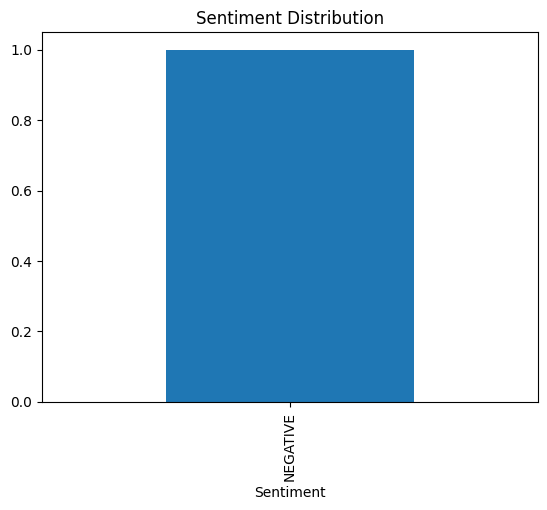

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Feedback": [feedback],
    "Sentiment": [sentiment[0]['label']],
    "Issue Category": [classification[0]['label']],
    "Entities": [entities]
}

df = pd.DataFrame(data)

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.show()
